In [27]:
# Import Libraries 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [28]:
# Reading the dataset

dataset = pd.read_csv('Mapping_Police_Violence.csv')
dataset.shape

(12806, 61)

In [29]:
unknown_race_count = dataset['race'].value_counts()['Unknown race']
print("Number of rows with 'Unknown race':", unknown_race_count)

Number of rows with 'Unknown race': 1247


In [30]:
# Filter rows where race is not 'Unknown race'
dataset = dataset[dataset['race'] != 'Unknown race']

# Print the updated DataFrame shape
print("Updated DataFrame shape after removing rows with 'Unknown race':", dataset.shape)

Updated DataFrame shape after removing rows with 'Unknown race': (11559, 61)


In [31]:
# Removing columns that are not required


columns_to_remove = ['victim_image', 'street_address','city','county','zip','ori','news_urls','call_for_service','tract','urban_rural_uspsai',
                     'wapo_id','fe_id','officer_names','officer_known_past_shootings','urban_rural_nchs','hhincome_median_census_tract',
                     'latitude','longitude','pop_total_census_tract','pop_white_census_tract','pop_black_census_tract','pop_native_american_census_tract',
                     'pop_asian_census_tract','pop_pacific_islander_census_tract','pop_other_multiple_census_tract','pop_hispanic_census_tract',
                     'congressional_district_113','congressperson_lastname','congressperson_firstname','congressperson_party','prosecutor_head',
                     'prosecutor_party','prosecutor_term','prosecutor_in_court','prosecutor_special','independent_investigation',
                     'prosecutor_url','disposition_official','officer_charged','geography']
dataset.drop(columns=columns_to_remove,inplace=True)
# columns_to_remove = ['victim_image', 'street_address','city','county','zip','ori','news_urls','call_for_service','tract','urban_rural_uspsai',
#                      'wapo_id','fe_id','officer_names','officer_races','officer_known_past_shootings','urban_rural_nchs','hhincome_median_census_tract',
#                      'latitude','longitude','pop_total_census_tract','pop_white_census_tract','pop_black_census_tract','pop_native_american_census_tract',
#                      'pop_asian_census_tract','pop_pacific_islander_census_tract','pop_other_multiple_census_tract','pop_hispanic_census_tract',
#                      'congressional_district_113','congressperson_lastname','congressperson_firstname','congressperson_party','prosecutor_head',
#                      'prosecutor_race','prosecutor_gender','prosecutor_party','prosecutor_term','prosecutor_in_court','prosecutor_special','independent_investigation',
#                      'prosecutor_url','disposition_official','officer_charged','off_duty_killing','geography']
dataset.shape

(11559, 21)

removing dae, circumsances

In [32]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'data'
# Drop the 'date' and 'circumstances' columns
dataset.drop(['date', 'circumstances', 'wapo_body_camera', 'initial_reason', 'agency_responsible', 'name'], axis=1, inplace=True)


In [33]:
dataset.head(20)

,age,gender,race,state,cause_of_death,signs_of_mental_illness,allegedly_armed,wapo_armed,wapo_threat_level,wapo_flee,off_duty_killing,encounter_type,officer_races,prosecutor_race,prosecutor_gender
2,62.0,Male,White,SC,Gunshot,Yes,Allegedly Armed,NaN,Brandished Weapon,Car,NaN,Traffic Stop,NaN,NaN,NaN
3,25.0,Male,White,TN,Gunshot,Yes,Allegedly Armed,Knife,Brandished Weapon,Not Fleeing,NaN,Mental Health/Welfare Check,NaN,NaN,NaN
4,30.0,Male,Black,TN,Gunshot,No,Unarmed/Did Not Have Actual Weapon,NaN,Sudden Threatening Movement,NaN,NaN,Traffic Stop,NaN,NaN,NaN
6,39.0,Male,Native American,ID,Gunshot,No,Unarmed/Did Not Have Actual Weapon,NaN,None,"Car, Foot",NaN,Other Non-Violent Offense,NaN,NaN,NaN
7,42.0,Male,White,KY,Gunshot,No,Unclear,NaN,Undetermined,Not Fleeing,NaN,None/Unknown,NaN,NaN,NaN
8,67.0,Male,White,MN,Gunshot,No,Allegedly Armed,Pipe,Brandished Weapon,Not Fleeing,NaN,Traffic Stop,NaN,NaN,NaN
9,31.0,Male,Hispanic,TX,Gunshot,Yes,Allegedly Armed,Knife,Attack,Not Fleeing,NaN,Part 1 Violent Crime,NaN,NaN,NaN
11,36.0,Male,White,AR,Gunshot,Drug or Alcohol Use,Allegedly Armed,NaN,Brandished Weapon,Not Fleeing,NaN,Person with a Weapon,NaN,NaN,NaN
14,NaN,Male,Black,TX,Gunshot,No,Allegedly Armed,NaN,Used Weapon,Not Fleeing,NaN,Part 1 Violent Crime,NaN,NaN,NaN
15,52.0,Male,White,WI,Gunshot,No,Allegedly Armed,NaN,Brandished Weapon,Not Fleeing,NaN,Person with a Weapon,NaN,NaN,NaN


In [34]:
# Check for NaN values in each column
columns_with_nan = dataset.columns[dataset.isna().any()].tolist()

# Print columns with NaN values
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: ['age', 'gender', 'race', 'cause_of_death', 'signs_of_mental_illness', 'allegedly_armed', 'wapo_armed', 'wapo_threat_level', 'wapo_flee', 'off_duty_killing', 'encounter_type', 'officer_races', 'prosecutor_race', 'prosecutor_gender']


<h2>Replacing NaN values

In [35]:
# Import pandas library
import pandas as pd

# Replace NaN values with appropriate strategies
dataset['age'].fillna(dataset['age'].median(), inplace=True)
dataset['race'].fillna(dataset['race'].mode()[0], inplace=True)
dataset['cause_of_death'].fillna(dataset['cause_of_death'].mode()[0], inplace=True)
dataset['signs_of_mental_illness'].fillna(dataset['signs_of_mental_illness'].mode()[0], inplace=True)
dataset['wapo_flee'].fillna(dataset['wapo_flee'].mode()[0], inplace=True)
dataset['off_duty_killing'].fillna('Not known', inplace=True)
dataset['encounter_type'].fillna(dataset['encounter_type'].mode()[0], inplace=True)
dataset['prosecutor_race'].fillna(dataset['prosecutor_race'].mode()[0], inplace=True)
dataset['prosecutor_gender'].fillna(dataset['prosecutor_gender'].mode()[0], inplace=True)

<h2>Analyzing redundant classes of columns for cleaning

In [36]:
columns_to_check = ['age', 'state', 'signs_of_mental_illness', 'wapo_flee', 'prosecutor_race', 'prosecutor_gender', 'race', 'off_duty_killing']

for column in columns_to_check:
    unique_values = dataset[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'age':
[ 62.  25.  30.  39.  42.  67.  31.  36.  35.  52.  32.  37.  43.  54.
  23.  50.  28.  58.  69.  34.  40.  26.  41.  53.  85.  44.  51.  63.
  33.  29.  46.  55.  27.  45.  19.  49.  65.  17.  47.  59.  18.  38.
  75.  24.  48.  81.  73.  66.  61.  16.  56.  20.  10.  12.  21.  57.
  60.  22.   5.  78.  79.  68.  64.  13.  15.  71.  82.  88.  14.  86.
  76.  77.  83.  72.  70.  74.   1.   2.  84.  80.   8.  91.  11.  92.
   6.   7.   9.  95.  93. 107.  89.]

Unique values in column 'state':
['SC' 'TN' 'ID' 'KY' 'MN' 'TX' 'AR' 'WI' 'CO' 'CA' 'MO' 'FL' 'AZ' 'IL'
 'NC' 'NY' 'GA' 'MT' 'PA' 'OH' 'MS' 'NM' 'NV' 'WA' 'KS' 'MI' 'WY' 'LA'
 'NE' 'AL' 'NJ' 'CT' 'MD' 'ME' 'HI' 'IN' 'DC' 'NH' 'VA' 'UT' 'OR' 'IA'
 'MA' 'AK' 'OK' 'WV' 'DE' 'ND' 'RI' 'VT' 'SD']

Unique values in column 'signs_of_mental_illness':
['Yes' 'No' 'Drug or Alcohol Use' 'Unknown'
 'History of Drug or Alcohol Use']

Unique values in column 'wapo_flee':
['Car' 'Not Fleeing' 'Car, Foot' 'Foot' 'Ot

<h4>Fixing signs_of_mental_illness column.<br>
-> Combining 'Drug or Alcohol Use' and 'History of Drug or Alcohol Use' into single column<br>
-> Replacing unknown with mode values<br>

In [37]:
# Replace 'Drug or Alcohol Use' and 'History of Drug or Alcohol Use' with 'Drug or Alcohol Use'
dataset['signs_of_mental_illness'].replace({'Drug or Alcohol Use': 'Drug or Alcohol Use',
                                            'History of Drug or Alcohol Use': 'Drug or Alcohol Use'}, inplace=True)

# Replace 'Unknown' with the mode value (most frequent value)
mode_value = dataset['signs_of_mental_illness'].mode()[0]
dataset['signs_of_mental_illness'].replace({'Unknown': mode_value}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'signs_of_mental_illness' after fixing:")
print(dataset['signs_of_mental_illness'].unique())


Unique values in column 'signs_of_mental_illness' after fixing:
['Yes' 'No' 'Drug or Alcohol Use']


<h4>Fixing 'wapo_flee' column.<br>
-> 'Car, foot' to Car<br>
-> 'Foot,Car' to Car<br>
-> 'Motorcycle,Foot' to Motorcycle<br>
-> and other to the mode<br>

In [38]:
# Replace specified combinations of values
dataset['wapo_flee'].replace({'Car, Foot': 'Car', 'Foot, Car': 'Car', 'Motorcycle, Foot': 'Motorcycle'}, inplace=True)

# Replace 'Other' with the mode value
mode_value = dataset['wapo_flee'].mode()[0]
dataset['wapo_flee'].replace({'Other': mode_value}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'wapo_flee' after fixing:")
print(dataset['wapo_flee'].unique())


Unique values in column 'wapo_flee' after fixing:
['Car' 'Not Fleeing' 'Foot' 'Motorcycle' 'bicycle' 'tractor' 'ATV']


<h4>Fixing 'prosecutor_race' column: <br> -> by replacing 'White, White' with White

In [39]:
# Replace 'White, White' with 'White'
dataset['prosecutor_race'].replace({'White, White': 'White'}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'prosecutor_race' after fixing:")
print(dataset['prosecutor_race'].unique())

Unique values in column 'prosecutor_race' after fixing:
['White' 'Black' 'Hispanic' 'Pacific Islander' 'Asian']


<h4>Fixing race column: <br> 
-> changing 'Native Hawaiian and Pacific Islander' to Pacific Islander 

In [40]:
# Replace 'Native Hawaiian and Pacific Islander' with 'Pacific Islander'
dataset['race'].replace({'Native Hawaiian and Pacific Islander': 'Pacific Islander'}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'race' after fixing:")
print(dataset['race'].unique())


Unique values in column 'race' after fixing:
['White' 'Black' 'Native American' 'Hispanic' 'Asian' 'Pacific Islander']


<h1>Encoding string based columns

In [41]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding and add 1 to the encoded values
dataset['signs_of_mental_illness'] = label_encoder.fit_transform(dataset['signs_of_mental_illness']) + 1
dataset['allegedly_armed'] = label_encoder.fit_transform(dataset['allegedly_armed']) + 1
dataset['wapo_armed'] = label_encoder.fit_transform(dataset['wapo_armed']) + 1
dataset['wapo_threat_level'] = label_encoder.fit_transform(dataset['wapo_threat_level']) + 1
dataset['wapo_flee'] = label_encoder.fit_transform(dataset['wapo_flee']) + 1
dataset['off_duty_killing'] = label_encoder.fit_transform(dataset['off_duty_killing']) + 1
dataset['encounter_type'] = label_encoder.fit_transform(dataset['encounter_type']) + 1

dataset['officer_races'] = label_encoder.fit_transform(dataset['officer_races']) + 1
dataset['cause_of_death'] = label_encoder.fit_transform(dataset['cause_of_death']) + 1
dataset['prosecutor_gender'] = label_encoder.fit_transform(dataset['prosecutor_gender']) + 1
dataset['prosecutor_race'] = label_encoder.fit_transform(dataset['prosecutor_race']) + 1

dataset['gender'] = label_encoder.fit_transform(dataset['gender']) + 1
dataset['state'] = label_encoder.fit_transform(dataset['state']) + 1

In [42]:
dataset.head(10)

,age,gender,race,state,cause_of_death,signs_of_mental_illness,allegedly_armed,wapo_armed,wapo_threat_level,wapo_flee,off_duty_killing,encounter_type,officer_races,prosecutor_race,prosecutor_gender
2,62.0,2,White,41,19,3,1,213,2,2,1,21,43,5,3
3,25.0,2,White,43,19,3,1,96,2,5,1,6,43,5,3
4,30.0,2,Black,43,19,2,2,213,5,5,1,21,43,5,3
6,39.0,2,Native American,14,19,2,2,213,3,2,1,10,43,5,3
7,42.0,2,White,18,19,2,3,213,7,5,1,7,43,5,3
8,67.0,2,White,24,19,2,1,145,2,5,1,21,43,5,3
9,31.0,2,Hispanic,44,19,3,1,96,1,5,1,11,43,5,3
11,36.0,2,White,3,19,1,1,213,2,5,1,16,43,5,3
14,35.0,2,Black,44,19,2,1,213,8,5,1,11,43,5,3
15,52.0,2,White,49,19,2,1,213,2,5,1,16,43,5,3


<h3>Preparing race column for one vs rest comparison

In [43]:
# dataset['race_binary'] = dataset['race'].apply(lambda x: 1 if x.lower() == 'hispanic' else 0)
# dataset.drop(columns=['race'], inplace=True)
# dataset.rename(columns={'race_binary': 'race'}, inplace=True)

df = dataset.copy()

df['race_binary'] = dataset['race'].apply(lambda x: 1 if x.lower() == 'hispanic' else 0)
df.drop(columns=['race'], inplace=True)
df.rename(columns={'race_binary': 'race'}, inplace=True)

<h3>Analyzing correlations between 'race' and other columns

/var/folders/wt/07csprcj0b79dwm10ts4hh1m0000gn/T/ipykernel_14957/3569804389.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


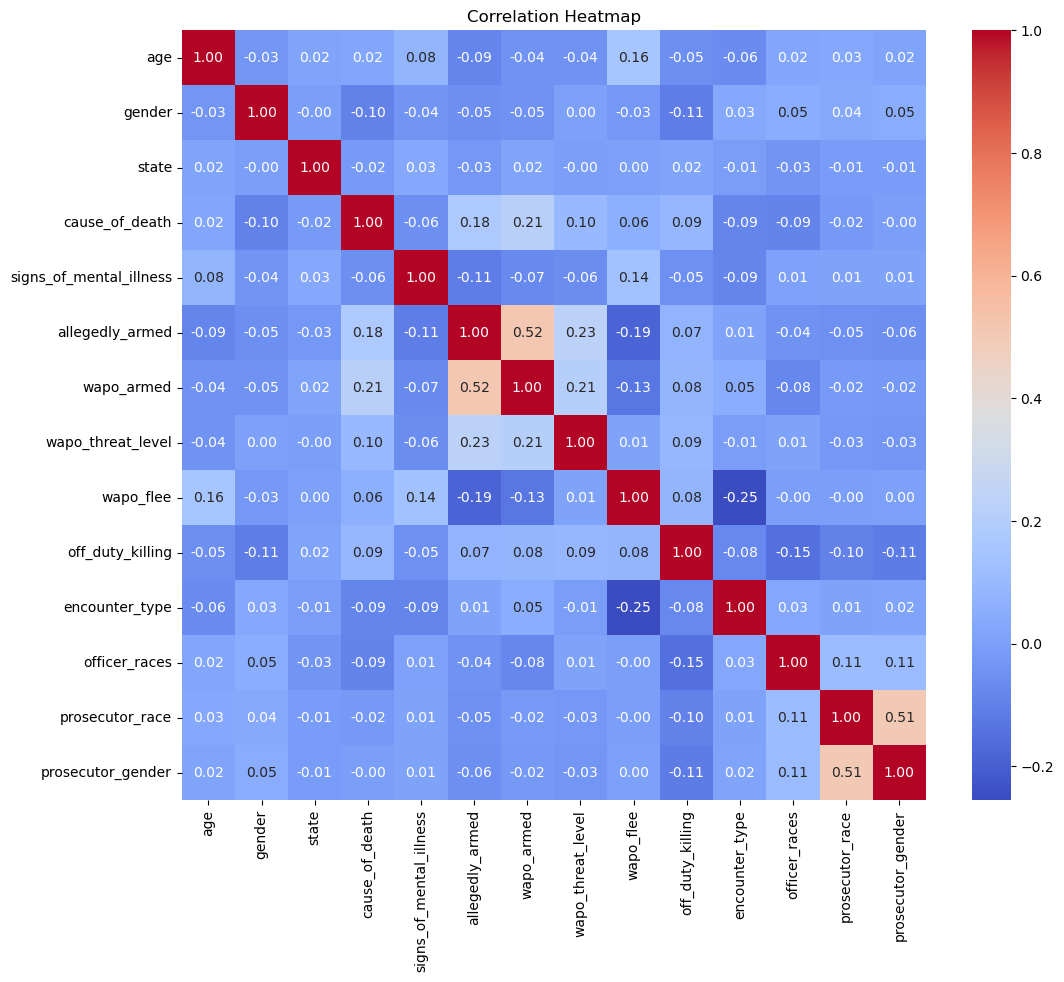

In [44]:
corr_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h2>Train-Test Split<br>
<h3>The variables we choose are: <br> <h4><i>'age', 'state', 'signs_of_mental_illness', 'wapo_flee', 'prosecutor_race', 'gender','wapo_threat_level', 'off_duty_killing'.<i>

In [45]:
X = df[['age', 'state', 'signs_of_mental_illness', 'wapo_flee', 'prosecutor_race', 'gender','wapo_threat_level', 'off_duty_killing']]
y = df['race']

# Split the datasetset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9247, 8), (2312, 8), (9247,), (2312,))

<h2> Running logistic regression to train our model in predicting Hispanic race incidents
<h4><i>OVR strategy<i><h4> 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(multi_class='ovr', solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8083910034602076


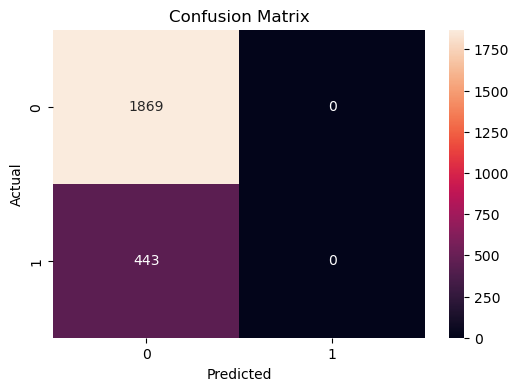


Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1869
           1       0.00      0.00      0.00       443

    accuracy                           0.81      2312
   macro avg       0.40      0.50      0.45      2312
weighted avg       0.65      0.81      0.72      2312



/Users/ajm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ajm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ajm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[i for i in np.unique(y_test)], columns=[i for i in np.unique(y_test)])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

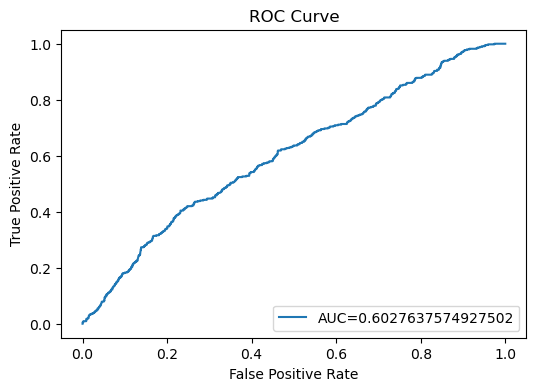

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC="+str(auc))

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)

plt.show()

<h1> Initial Experiment Results </h1>

<p> For the initial experiment, we gave a value of 1 to the hispanic race and 0 to all other races. Initially, we attained a decent accuracy score with this model which means that the model correctly predicted the race for approximately 80.84% of the test dataset. However, this does not give us the complete story, which brings us to other metrics for performance. The confusion matrix in the second image shows that there were 1869 correct predictions for class '0' and 443 correct predictions for class '1'. There are no off-diagonal elements, which means there were no instances where class '0' was mistaken for class '1', or vice versa. This seems quite unusual for a real-world dataset. Our inference is that this occurs to the imbalances in the data. This is because the model seems to perform well for class '0' but fails completely for class '1'. This is evident from the classification report where class '1' has zero precision and recall. Moreover, the absence of any predicted instances for class '1' suggests that the model might be biased towards class '0' which is dominated with the "White" race. Given the complete lack of predictions for class '1', we can infer that the dataset is systematically structured to underrepresent minorities and overrepresent the White race.</p>

<h5>Understanding the ROC Curve and AUC Calculation</h5>

<p> <b> ROC Curve: </b>The ROC curve seems to rise slowly towards the True Positive Rate (TPR) of 1, which suggests that in order to correctly predict the minority class (class '1'), the model also increases the False Positive Rate (FPR) which means that it is struggling to separate the two classes without making a significant number of false positive errors. Considering what we saw earlier in the confusion matrix, which showed perfect recall for class '0' but none for class '1', we can draw the following conclusions: </p>

<li>The current model is capable of identifying the majority class '0' quite well, but at the expense of incorrectly classifying many instances of the minority class '1' as the majority class.</li>
<li>There's a significant imbalance in model performance across classes, with the model heavily favoring the majority class.</li>
<li>We need to address the class imbalance.</li>

<p> <b> AUC Score: </b>The AUC score is approximately 0.6027 which is marginally better than a random guess, which would have an AUC of 0.5. For the reader's reference, an AUC of 1 represents a perfect model, while an AUC closer to 0.5 suggests that the model has limited ability to distinguish between the classes. </p>

<h1> Next Experiment:  SMOTE (Synthetic Minority Over-sampling Technique) </h1>

<h5> While we achieved a high accuracy for the initial experiment, it is not a good indicator of performance for the aforementioned reasons. In this experiment, we will be using SMOTE to mitigate class imbalances and re-evaluate our logistic regression model with our revised balanced dataset. Moreover, we will be using the 'saga' solver, or the Stochastic Average Gradient descent with Augmented factorization and Intrinsic momentum. It's a variation of the sag solver that also supports the non-smooth penalty='l1' option which we have commonly referred to in class as the L1 Lasso Regularization technique. Given our dataset, this is the best choice as it handles sparse multinomial logistic regression effectively and is very fast for datasets of considerable size.</h5>

In [49]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=65)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
clf2 = LogisticRegression(multi_class='ovr', solver='saga', penalty='l1', max_iter=10000)
clf2.fit(X_train_smote, y_train_smote)
y_pred2 = clf2.predict(X_test)

accuracy2 = accuracy_score(y_test.values, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.5791522491349481


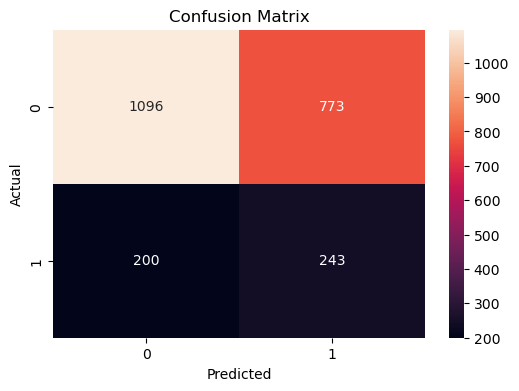


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.59      0.69      1869
           1       0.24      0.55      0.33       443

    accuracy                           0.58      2312
   macro avg       0.54      0.57      0.51      2312
weighted avg       0.73      0.58      0.62      2312



In [50]:
cm2 = confusion_matrix(y_test, y_pred2)
cm_df2 = pd.DataFrame(cm2, index=[i for i in np.unique(y_test)], columns=[i for i in np.unique(y_test)])
plt.figure(figsize=(6,4))
sns.heatmap(cm_df2, annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

report2 = classification_report(y_test, y_pred2)
print("\nClassification Report:\n", report2)

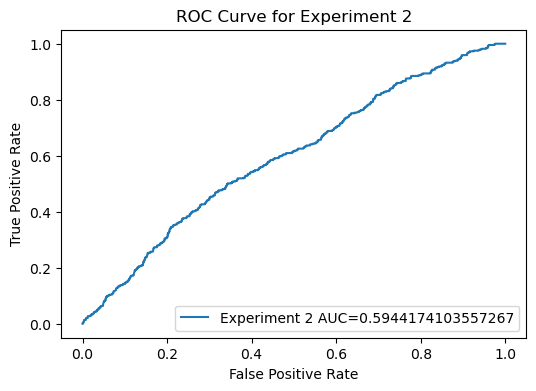

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba2 = clf2.predict_proba(X_test)[::,1]

fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)

auc2 = roc_auc_score(y_test, y_pred_proba2)

plt.figure(figsize=(6,4))

plt.plot(fpr2, tpr2, label="Experiment 2 AUC="+str(auc2))

plt.title('ROC Curve for Experiment 2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)

plt.show()

<h1> Experiment 2 Results </h1>



<h5>

Given the current data and configuration, we were able to make the saga solver converge with increased iterations and finetune the model's parameters to their optimal point as much as we could. 

In the initial experiment without SMOTE, an 80% accuracy was an unreliable metric. Now, the accuracy is approximately 0.5795. While this is lower than the first experiment, it may now be a more meaningful metric since the class imbalance has been addressed. Nonetheless, the model is now actually recognizing instances of the minority class, whereas it previously predicted none. The recall for the minority Hispanic class has substantially improved (from 0 to 0.55), indicating that the model's sensitivity to the minority class is much better, even though the precision for this class is low. Moreover, the AUC has decreased slightly (from 0.6027 to 0.5944), which may suggest that the model's ability to distinguish between classes is not markedly improved, but it is now actually attempting to do so for both classes.

Overall, using SMOTE to address class imbalance has led to a classifier that is more balanced in terms of its sensitivity to both classes, which is a good outcome. Furthermore, the lowered accuracy and AUC in the context of a balanced dataset indicate that while the model may not perform as well overall according to these metrics, it is now a more fair and balanced classifier. The key highlight, however, of this experiment is that we were successfully able to increase the recall for the Hispanic minority class, which is a critical improvement in the direction of detecting police violence against minority classes like Hispanics. While it is true that this improvement came at the expense of making more false positive errors for this class, it is important to take into consideration that we began with a dataset that was systematically structured to be biased towards the White race.</h5>


